# User Statistics

-  gender, age, experience, usage distribution
- correlations:
-   usage frequency and years of experience
- usage distribution per gender
- usage distributen per age group

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../../giicg.db")
users = pd.read_sql("Select * from users WHERE lastpage >= 3", conn)
conn.close()
users = users[users['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])]
users['work_exp_years'] = pd.to_numeric(users['work_exp_years'], errors='coerce')
users['study_year'] = pd.to_numeric(users['study_year'], errors='coerce')


## Simple distributions

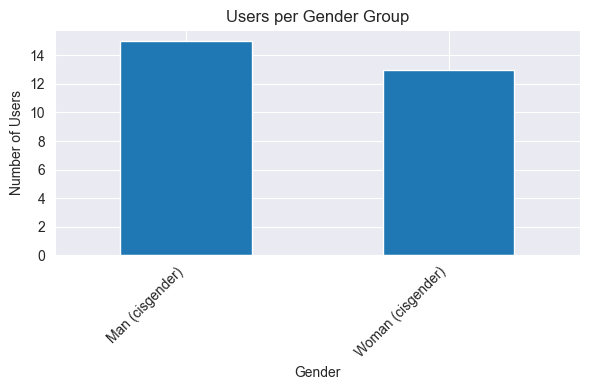

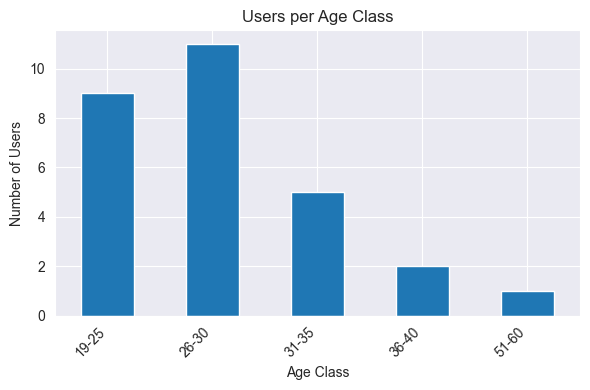

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_31188/3366796198.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)


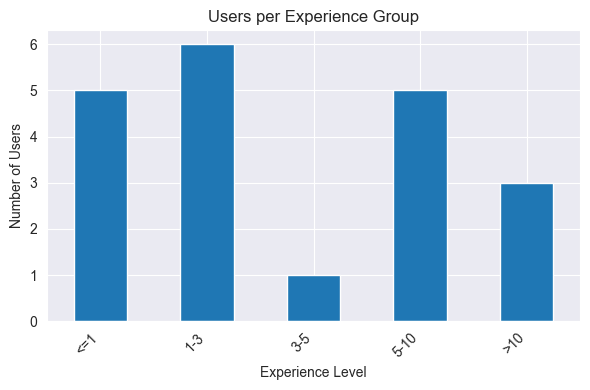

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_31188/3366796198.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)


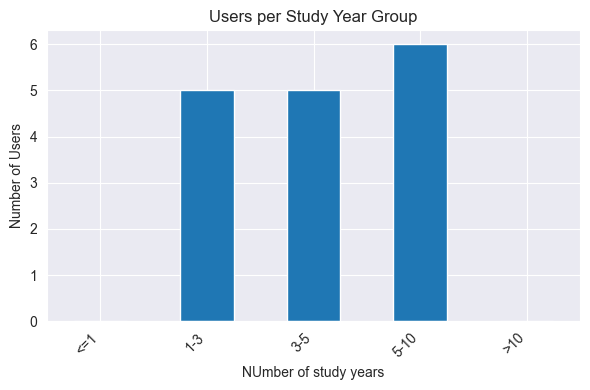

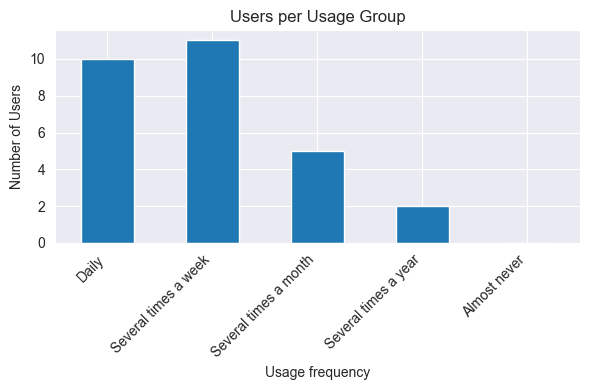

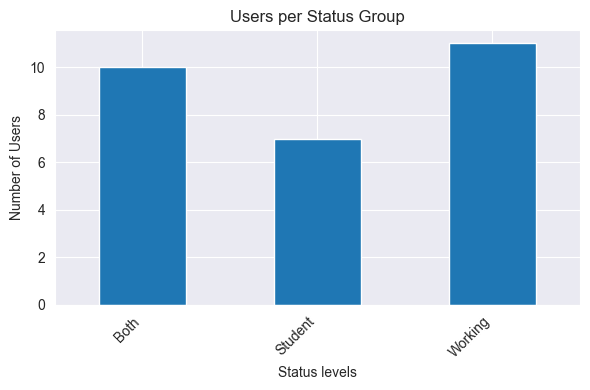

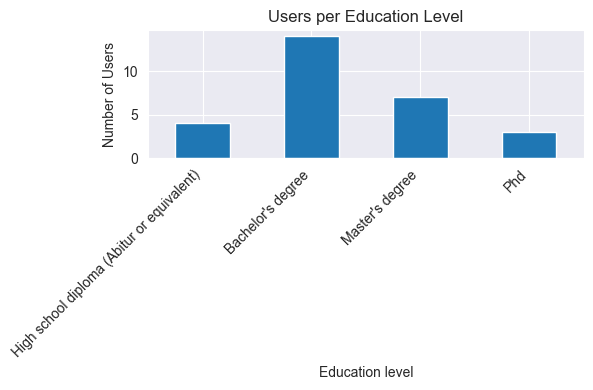

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar(data, column, title, xlabel, ylabel):
    ax = data[column].value_counts().sort_index().plot(kind="bar", figsize=(6,4))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Number of users per gender group
plot_bar(users, 'gender', "Users per Gender Group", "Gender", "Number of Users")

# Number of users per age class
plot_bar(users, 'age', "Users per Age Class", "Age Class", "Number of Users")

users['work_exp_years'] = pd.to_numeric(users['work_exp_years'], errors='coerce')
filtered = users[(users['work_exp_years'] <= 50) & (users['work_exp_years'].notna())]
bins = [-float('inf'), 1, 3, 5, 10, float('inf')]
labels = ['<=1', '1-3', '3-5', '5-10', '>10']
filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)
plot_bar(filtered, 'work_exp_group', "Users per Experience Group", "Experience Level", "Number of Users")

users['study_year'] = pd.to_numeric(users['study_year'], errors='coerce')
filtered = users[(users['study_year'] <= 50) & (users['study_year'].notna())]
bins = [-float('inf'), 1, 3, 5, 10, float('inf')]
labels = ['<=1', '1-3', '3-5', '5-10', '>10']
filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)
plot_bar(filtered, 'study_year_group', "Users per Study Year Group", "NUmber of study years", "Number of Users")

usage_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
users['usage_frequency'] = pd.Categorical(
    users['usage_frequency'],
    categories=usage_order,
    ordered=True
)
plot_bar(users, 'usage_frequency', "Users per Usage Group", "Usage frequency", "Number of Users")


# Number of users per usage group (assumed column: usage)
plot_bar(users, 'status', "Users per Status Group", "Status levels", "Number of Users")

education_order = [
    "High school diploma (Abitur or equivalent)",
    "Bachelor's degree",
    "Master's degree",
    "Phd",
]
users['education'] = pd.Categorical(
    users['education'],
    categories=education_order,
    ordered=True
)
plot_bar(users, 'education', "Users per Education Level", "Education level", "Number of Users")



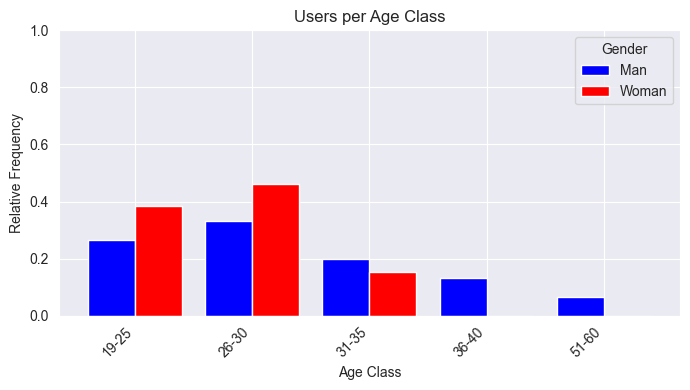

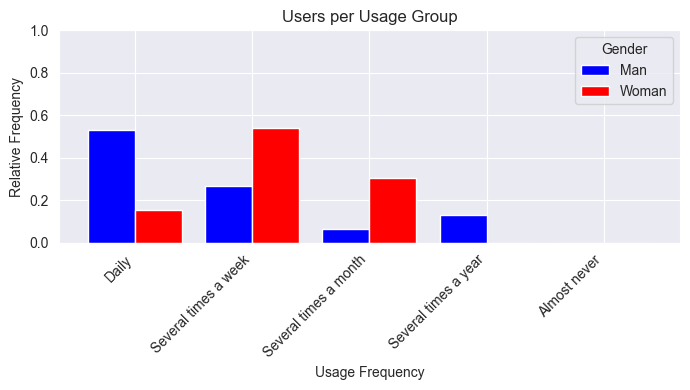

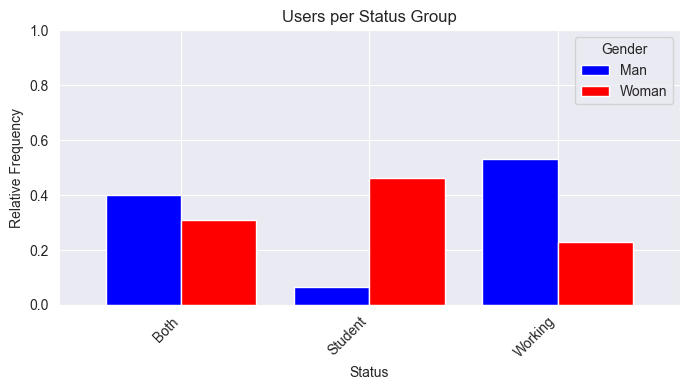

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_31188/4115452056.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)


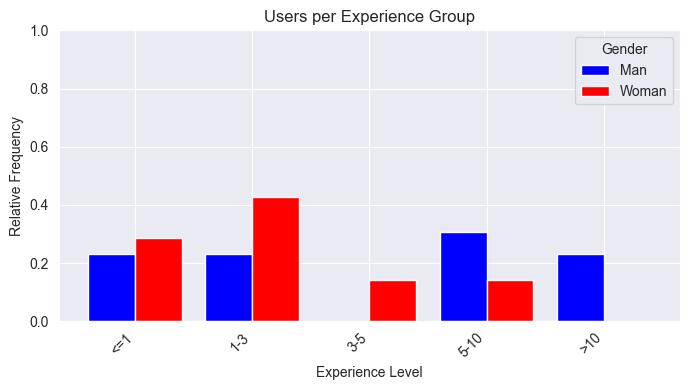

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_31188/4115452056.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)


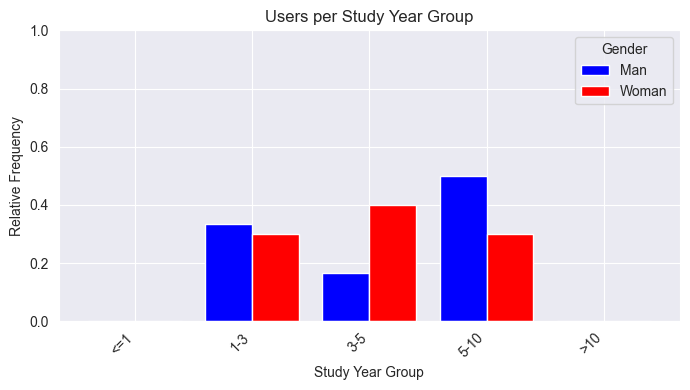

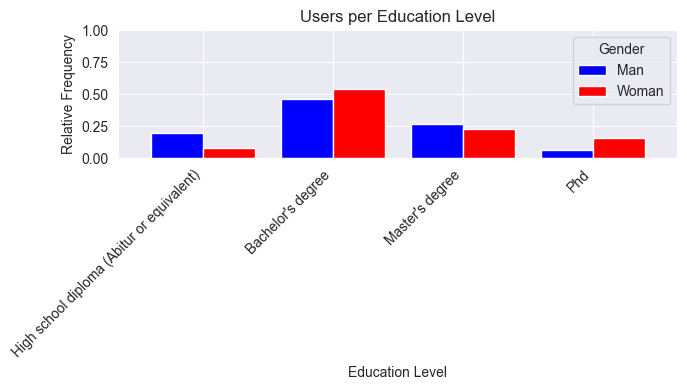

In [8]:
from matplotlib import pyplot as plt


def plot_bar_by_gender(data, column, title, xlabel, ylabel, categories=None, category_order=None):
    # Prepare and filter
    df = data.copy()
    if categories is not None:
        df = df[df[column].isin(categories)]
    df['gender'] = df['gender'].replace({'Woman (cisgender)': 'Woman', 'Man (cisgender)': 'Man'})

    # Group counts
    counts = df.groupby([column, 'gender'], observed=True).size().unstack(fill_value=0)

    # Convert counts to relative frequencies (proportions)
    # This calculates the proportion within each gender group
    relative_freq = counts.div(counts.sum(axis=0), axis=1)

    if category_order is not None:
        relative_freq = relative_freq.reindex(category_order)
    else:
        relative_freq = relative_freq.sort_index()

    ax = relative_freq.plot(
        kind="bar",
        figsize=(7, 4),
        color={'Woman': 'red', 'Man': 'blue'},
        width=0.8
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel.replace("Number of Users", "Relative Frequency"))
    ax.set_ylim(0, 1)  # Set y-axis to 0-1 range for proportions
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()


# Example usage for each plot
plot_bar_by_gender(users, 'age', "Users per Age Class", "Age Class", "Number of Users")
plot_bar_by_gender(users, 'usage_frequency', "Users per Usage Group", "Usage Frequency", "Number of Users",
                   category_order=usage_order)
plot_bar_by_gender(users, 'status', "Users per Status Group", "Status", "Number of Users")

# For experience: use your filtered and binned DataFrame
filtered = users[(users['work_exp_years'] <= 50) & (users['work_exp_years'].notna())]
filtered['work_exp_group'] = pd.cut(filtered['work_exp_years'], bins=bins, labels=labels, right=True)
plot_bar_by_gender(filtered, 'work_exp_group', "Users per Experience Group", "Experience Level", "Number of Users",
                   category_order=labels)

# For study years
filtered = users[(users['study_year'] <= 50) & (users['study_year'].notna())]
filtered['study_year_group'] = pd.cut(filtered['study_year'], bins=bins, labels=labels, right=True)
plot_bar_by_gender(filtered, 'study_year_group', "Users per Study Year Group", "Study Year Group", "Number of Users",
                   category_order=labels)

# For education
plot_bar_by_gender(users, 'education', "Users per Education Level", "Education Level", "Number of Users",
                   category_order=education_order)

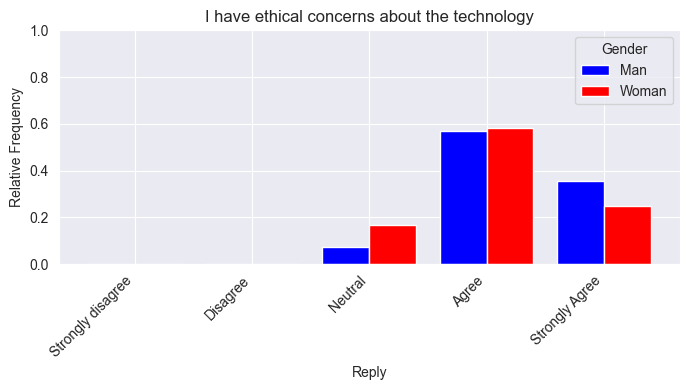

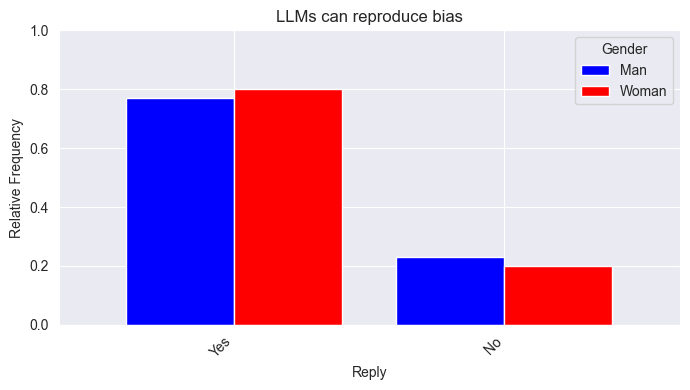

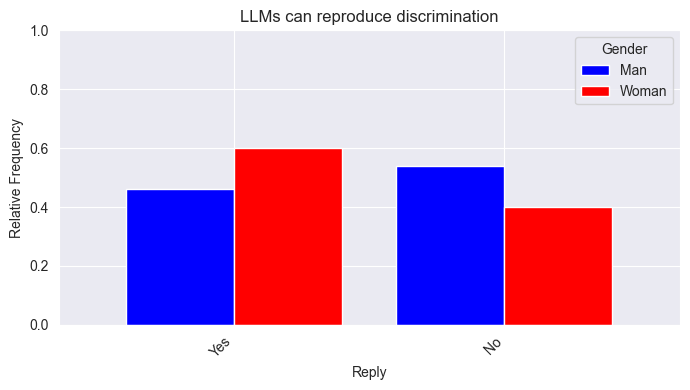

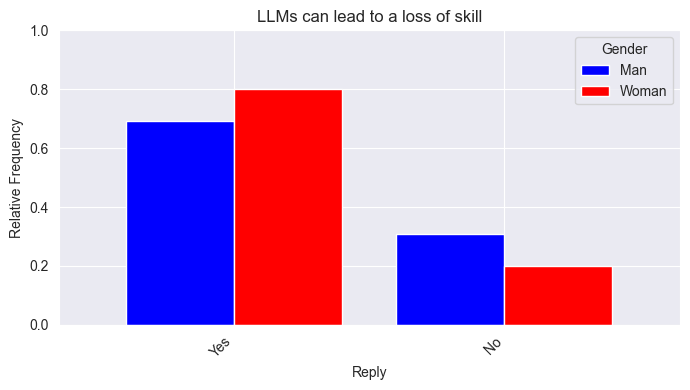

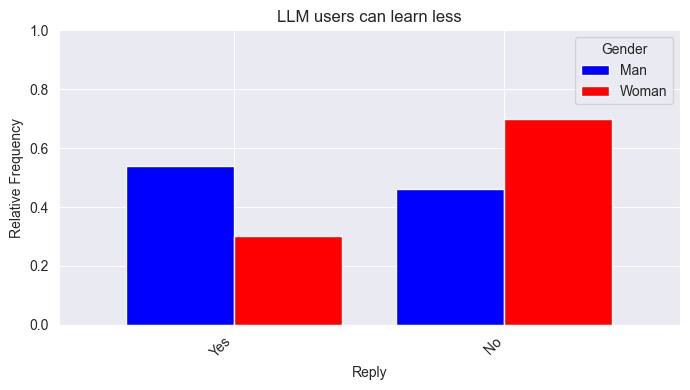

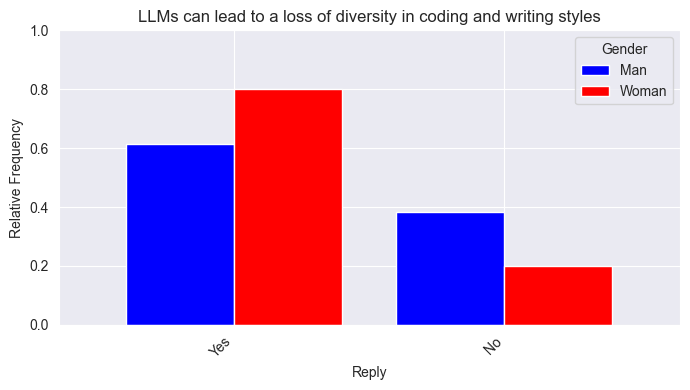

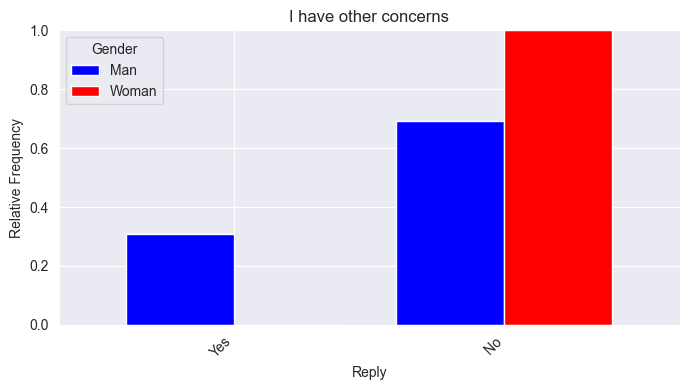

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_describe_approach,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts
0,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Faster development,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,None,Agree,Yes,No,Yes,Yes,No,No,None,None
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,None,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None
3,15,8,1937126585,26-30,Phd,Working,None,NaN,Immunology research and biomedical analytics s...,6.0,...,I can now write production code in languages t...,Agree,Yes,No,Yes,Yes,Yes,No,None,"Programming, problem solving and comprehension..."
4,16,8,1979098288,19-25,Bachelor's degree,Student,Computer Engineering (M.Sc.),2.0,None,NaN,...,"I am brainstorming ""together"" with the LLM bef...",Agree,Yes,Yes,No,No,Yes,No,None,Sometimes when I am in a hurry I don´t check p...
5,25,8,1442054330,26-30,Bachelor's degree,Working,None,NaN,Software engineering for the web,6.0,...,None,Neutral,None,None,None,None,None,None,None,It produces a lot of very bad unmaintainable c...
6,28,8,1943323569,31-35,Phd,Working,None,NaN,Research on LLMs for transparency and responsi...,5.0,...,I am now mostly describing my problems in natu...,Agree,Yes,No,Yes,No,Yes,No,None,They might reduce people's creative thinking.
7,29,8,978929840,26-30,Master's degree,Student,PhD in Computer Science,3.0,None,NaN,...,I use LLMs to consult me regarding the setup o...,Agree,Yes,No,No,Yes,Yes,No,None,None
9,31,8,1395672098,36-40,High school diploma (Abitur or equivalent),Working,None,NaN,Software Engineering,22.0,...,If the challenges don't look interesting to me...,Strongly Agree,Yes,Yes,Yes,No,Yes,Yes,LLMs might reduce the motivation to publish kn...,"As a coding assistant, at the current state, L..."
10,34,8,1374827140,51-60,Master's degree,Working,None,NaN,Interface design and Software architeture,20.0,...,None,Agree,No,No,Yes,No,No,No,None,Too many to write into this box.


In [9]:
response_order_agree = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly Agree"
]

response_order_yes_no = [
    "Yes",
    "No",
]

plot_bar_by_gender(users, 'llms_ethical_concerns', "I have ethical concerns about the technology", "Reply", "Number of Users", category_order=response_order_agree)
plot_bar_by_gender(users, 'llms_ec_bias', "LLMs can reproduce bias", "Reply", "Number of Users", category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_discrimination', "LLMs can reproduce discrimination", "Reply", "Number of Users", category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_skill_loss', "LLMs can lead to a loss of skill", "Reply", "Number of Users", category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_learn_less', "LLM users can learn less", "Reply", "Number of Users", category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_diversity_loss', "LLMs can lead to a loss of diversity in coding and writing styles", "Reply", "Number of Users", category_order=response_order_yes_no)
plot_bar_by_gender(users, 'llms_ec_other', "I have other concerns", "Reply", "Number of Users", category_order=response_order_yes_no)
users

In [17]:
users

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_describe_approach,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts
0,2,1,1296226278,26-30,Bachelor's degree,Student,M.Sc Remote Sensing,4.0,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,3,1,553813837,19-25,Master's degree,Working,None,NaN,AI engineering,0.6,...,None,None,None,None,None,None,None,None,None,None
2,4,1,1072095501,19-25,Bachelor's degree,Student,Information Systems Management (M.Sc.),5.0,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,5,1,1533252753,19-25,Master's degree,Both,Computer science M.Sc,7.0,Student researcher at TU berlin xplainable NLP...,0.0,...,None,None,None,None,None,None,None,None,None,None
4,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Faster development,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,92,8,177546188,36-40,Master's degree,Working,None,NaN,Research Associate,3.0,...,None,Strongly Agree,Yes,Yes,Yes,Yes,Yes,No,None,None
65,93,1,1806620531,26-30,Master's degree,Working,None,NaN,Research Associate,2.0,...,None,None,None,None,None,None,None,None,None,None
66,94,2,141913795,26-30,High school diploma (Abitur or equivalent),Student,Medieninfomatik (B.A),9.0,None,NaN,...,None,None,None,None,None,None,None,None,None,None
67,95,1,1327220393,31-35,Bachelor's degree,Both,Medieninformatik,1.0,E-learning,1.0,...,None,None,None,None,None,None,None,None,None,None


## Correlations

Correlation between usage_frequency and work_exp_years: -0.212


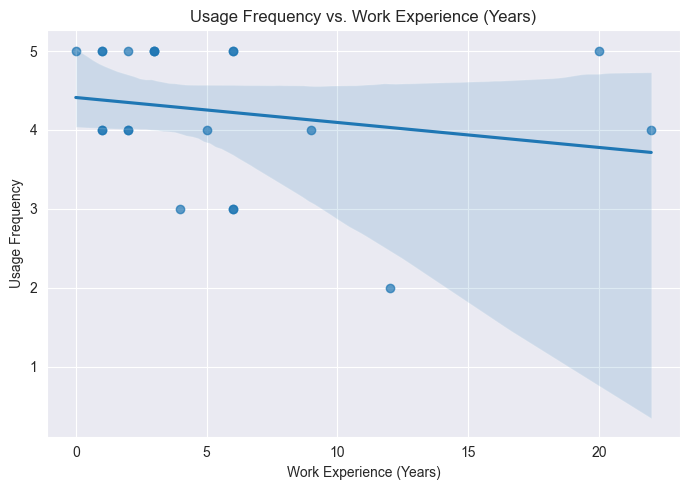

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts,usage_frequency_num
0,6,8,1673258229,19-25,Bachelor's degree,Both,Data Science (M.Sc),2026.0,Data engineer in auomotive company,3.0,...,Agree,No,No,No,No,No,Yes,LLMs can use code protected from specific usage,None,5
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,Agree,Yes,No,Yes,Yes,No,No,None,None,4
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,4
3,15,8,1937126585,26-30,Phd,Working,None,NaN,Immunology research and biomedical analytics s...,6.0,...,Agree,Yes,No,Yes,Yes,Yes,No,None,"Programming, problem solving and comprehension...",5
5,25,8,1442054330,26-30,Bachelor's degree,Working,None,NaN,Software engineering for the web,6.0,...,Neutral,None,None,None,None,None,None,None,It produces a lot of very bad unmaintainable c...,5
6,28,8,1943323569,31-35,Phd,Working,None,NaN,Research on LLMs for transparency and responsi...,5.0,...,Agree,Yes,No,Yes,No,Yes,No,None,They might reduce people's creative thinking.,4
9,31,8,1395672098,36-40,High school diploma (Abitur or equivalent),Working,None,NaN,Software Engineering,22.0,...,Strongly Agree,Yes,Yes,Yes,No,Yes,Yes,LLMs might reduce the motivation to publish kn...,"As a coding assistant, at the current state, L...",4
10,34,8,1374827140,51-60,Master's degree,Working,None,NaN,Interface design and Software architeture,20.0,...,Agree,No,No,Yes,No,No,No,None,Too many to write into this box.,5
11,46,8,217230409,31-35,Bachelor's degree,Working,None,NaN,Software engineering in an e-commerce company,12.0,...,Strongly Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,2
14,55,8,2025687955,26-30,Bachelor's degree,Both,Computer Science,4.0,Software engineering,2.0,...,Agree,No,No,Yes,No,Yes,No,None,None,5


In [27]:
import seaborn as sns

freq_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
# Map each category to a numeric value (e.g., 5 for "Daily", 1 for "Almost never")
freq_map = {cat: i for i, cat in enumerate(reversed(freq_order), 1)}

users["usage_frequency_num"] = users["usage_frequency"].map(freq_map)

# Now you can compute the correlation
# Make sure to also handle work_exp_years as numeric
users["work_exp_years"] = pd.to_numeric(users["work_exp_years"], errors='coerce')
filtered = users[users["work_exp_years"] <= 50]
df_corr = filtered.dropna(subset=["usage_frequency_num", "work_exp_years"])
correlation = df_corr["usage_frequency_num"].corr(df_corr["work_exp_years"])

print(f"Correlation between usage_frequency and work_exp_years: {correlation:.3f}")

# Plot scatter plot
plt.figure(figsize=(7,5))
sns.regplot(x='work_exp_years', y='usage_frequency_num', data=df_corr, scatter_kws={'alpha':0.7})
plt.title('Usage Frequency vs. Work Experience (Years)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Usage Frequency')
plt.tight_layout()
plt.show()

df_corr


### Experience Years and Gender

In [ ]:
import seaborn as sns

freq_order = [
    "Daily",
    "Several times a week",
    "Several times a month",
    "Several times a year",
    "Almost never"
]
# Map each category to a numeric value (e.g., 5 for "Daily", 1 for "Almost never")
freq_map = {cat: i for i, cat in enumerate(reversed(freq_order), 1)}

users["usage_frequency_num"] = users["usage_frequency"].map(freq_map)

# Now you can compute the correlation
# Make sure to also handle work_exp_years as numeric
users["work_exp_years"] = pd.to_numeric(users["work_exp_years"], errors='coerce')
filtered = users[users["work_exp_years"] <= 50]
df_corr = filtered.dropna(subset=["usage_frequency_num", "work_exp_years"])
correlation = df_corr["usage_frequency_num"].corr(df_corr["work_exp_years"])

print(f"Correlation between usage_frequency and work_exp_years: {correlation:.3f}")

# Plot scatter plot
plt.figure(figsize=(7,5))
sns.regplot(x='work_exp_years', y='usage_frequency_num', data=df_corr, scatter_kws={'alpha':0.7})
plt.title('Usage Frequency vs. Work Experience (Years)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Usage Frequency')
plt.tight_layout()
plt.show()

df_corr

In [10]:
filtered

,user_id,lastpage,seed,age,education,status,study_field,study_year,work_field,work_exp_years,...,llms_ethical_concerns,llms_ec_bias,llms_ec_discrimination,llms_ec_skill_loss,llms_ec_learn_less,llms_ec_diversity_loss,llms_ec_other,llms_other_concerns,llms_other_thoughts,study_year_group
1,8,8,1155338690,19-25,Bachelor's degree,Both,Computer-aided design (CAD) (B.A),5.0,Computer vision,1.0,...,Agree,Yes,No,Yes,Yes,No,No,None,None,3-5
2,11,8,1462336171,26-30,Bachelor's degree,Both,Informatik (B.Sc.),4.0,Research assistant,1.0,...,Agree,Yes,Yes,Yes,Yes,Yes,No,None,None,3-5
4,16,8,1979098288,19-25,Bachelor's degree,Student,Computer Engineering (M.Sc.),2.0,None,NaN,...,Agree,Yes,Yes,No,No,Yes,No,None,Sometimes when I am in a hurry I don´t check p...,1-3
7,29,8,978929840,26-30,Master's degree,Student,PhD in Computer Science,3.0,None,NaN,...,Agree,Yes,No,No,Yes,Yes,No,None,None,1-3
13,48,8,2031177185,19-25,Bachelor's degree,Student,Information Systems Management (M.Sc.),6.0,None,NaN,...,Strongly Agree,Yes,Yes,Yes,No,Yes,No,None,- tbh it accelerates processes a lot\n- LLMs m...,5-10
14,55,8,2025687955,26-30,Bachelor's degree,Both,Computer Science,4.0,Software engineering,2.0,...,Agree,No,No,Yes,No,Yes,No,None,None,3-5
16,60,8,1849077149,19-25,High school diploma (Abitur or equivalent),Student,Physik (B.Sc.),5.0,None,NaN,...,Strongly Agree,Yes,Yes,Yes,No,Yes,No,None,None,3-5
17,63,3,831754724,26-30,Bachelor's degree,Both,"Remote Sensing, GeoInformation and Visualisati...",6.0,Data analysis and visualisation for a newspaper,2.0,...,None,None,None,None,None,None,None,None,None,5-10
18,65,8,151250910,19-25,Bachelor's degree,Student,Geoinformation,2.0,None,NaN,...,Agree,No,No,Yes,No,Yes,No,None,From a beginner’s perspective it’s temping to ...,1-3
19,73,8,712726586,31-35,Bachelor's degree,Student,Computer Science (M.Sc.),8.0,None,NaN,...,Agree,Yes,Yes,Yes,Yes,No,No,None,I fear that this will lead to more stress in t...,5-10
